In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#!unzip /content/drive/MyDrive/Indonesia_AI/Project2/YOLO.zip -d /content/drive/MyDrive/Indonesia_AI/Project2/

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Indonesia_AI/Project2/YOLO/darknet/build/darknet/x64/data/labels/70_1.png  
  inflating: /content/drive/MyDrive/Indonesia_AI/Project2/YOLO/images/000000016468.txt  
  inflating: /content/drive/MyDrive/Indonesia_AI/Project2/YOLO/images/000000014359.txt  
  inflating: /content/drive/MyDrive/Indonesia_AI/Project2/YOLO/images/000000014089.txt  
  inflating: /content/drive/MyDrive/Indonesia_AI/Project2/YOLO/darknet/build/darknet/x64/data/labels/73_1.png  
  inflating: /content/drive/MyDrive/Indonesia_AI/Project2/YOLO/images/000000015302.txt  
  inflating: /content/drive/MyDrive/Indonesia_AI/Project2/YOLO/darknet/build/darknet/x64/data/labels/69_4.png  
  inflating: /content/drive/MyDrive/Indonesia_AI/Project2/YOLO/darknet/data/labels/72_4.png  
  inflating: /content/drive/MyDrive/Indonesia_AI/Project2/YOLO/darknet/build/darknet/x64/data/labels/70_7.png  
  inflating: /content/drive/MyDrive/Indonesia_AI/Pr

In [4]:
%cd /content/drive/MyDrive/Indonesia_AI/Project2/YOLO

/content/drive/MyDrive/Indonesia_AI/Project2/YOLO


In [5]:
!ls

 backup				        darknet-master.zip
 creating-files-data-and-name.py        images
 creating-train-and-test-txt-files.py   images.rar
 custom_weight			       'pre-processing yolov3.ipynb'
 darknet


In [6]:
!apt-get update
!apt-get install build-essential

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [456 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [979 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [864 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13

In [7]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [8]:
%cd './darknet'

/content/drive/MyDrive/Indonesia_AI/Project2/YOLO/darknet


In [9]:
# Configure
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [10]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-08-03 16:18:49--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  17.6MB/s    in 15s     

2023-08-03 16:19:04 (16.2 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [11]:
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [

In [12]:
!./darknet detector  \
train /content/drive/MyDrive/Indonesia_AI/Project2/YOLO/images/labelled_data.data \
/content/drive/MyDrive/Indonesia_AI/Project2/YOLO/darknet/cfg/yolov3_custom.cfg \
/content/drive/MyDrive/Indonesia_AI/Project2/YOLO/custom_weight/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 1, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 1, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, N

In [15]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights data/person.jpg


 CUDA-version: 11080 (12000), cuDNN: 8.9.0, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

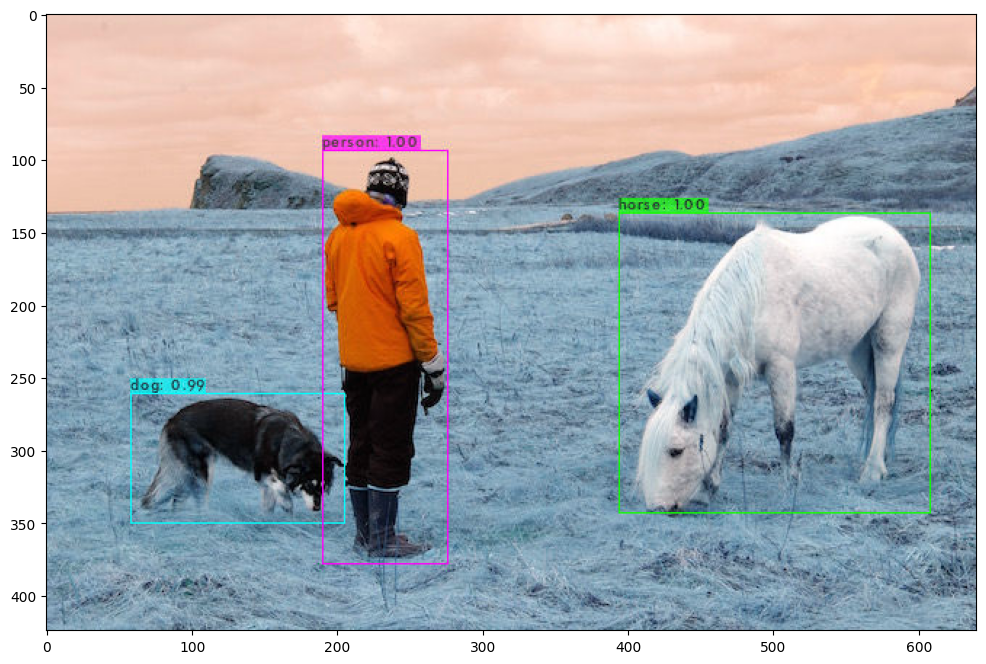

In [22]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

image = cv2.imread("predictions.jpg")
fig = plt.gcf()
fig.set_size_inches(12, 14)
plt.imshow(image)
#"/content/drive/MyDrive/Indonesia_AI/Project2/YOLO/darknet/data/predictions.jpg"#